In [84]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
from random import seed
from random import randint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import minmax_scale
from sklearn.cluster import KMeans
from tqdm.auto import tqdm
tqdm.pandas()

%autosave 30
# this line outosaves the notebook every 15 seconds

# seed random number generator
# seed(1)

Autosaving every 30 seconds


In [85]:
# Load the data
survey = pd.read_csv('04.15.24 Intrepid Build Market Research Survey - Eldar Copy.csv', 
                     dtype={
        "QID5": "category", 'Q1': "category", 'Q2': "category", 'Q3': "category", 'Q4': "category",
        'Q5': "category", 'Q6': "category", 'Q7': "category", 'Q8': "category", 'Q9': "category", 'Q10': "category", 'Q1_1':"category", 'Q1_2':"category", 'Q1_3': "category", 'Q1_4': "category",
        'Q1_5': "category", 'Q1_6': "category", 'Q1_7': "category", 'Q2.1': "category", 'Q3.1': "category", 'Q4.1': "category", 'Q5.1': "category", 'Q6.1': "category", 'Q7.1': "category",
        'Q8.1': "category", 'Q1.1': "category", 'Q2_1': "category", 'Q2_2': "category", 'Q3.2': "category", 'Q4.2': "category", 'Q5.2': "category", 'Q6.2': "category",
        'Q1_1.1': "category", 'Q2.2': "category", 'Q3.3': "category", 'Q4.3': "category", 'Q5_1': "category", 'Q5_2': "category", 'Q5_3': "category", 'Q5_4': "category",
        'Q5_5': "category", 'Q5_6': "category", 'Q6.3': "category", 'Q7.2': "category", 'Q1_1.2': "category", 'Q2_1.1': "category",
        'Q3_1': "category", 'Q4_1': "category", 'Q5_1.1': "category", 'Q6_1': "category", 'Q7_1': "category", 'Q8_1': "category", 'Q9_1': "category", 'Q10_1': "category",
        'Q11_1': "category",
    }
)
survey["Progress"] = survey["Progress"].astype("string")
survey["Progress"] = pd.to_numeric(survey["Progress"], errors='coerce')
# have a quick look at the data
survey.head()


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q2_1.1,Q3_1,Q4_1,Q5_1.1,Q6_1,Q7_1,Q8_1,Q9_1,Q10_1,Q11_1
0,Start Date,End Date,Response Type,IP Address,<NA>,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Q2. Please rate how strongly you agree or disa...,Q3. Please rate how strongly you agree or disa...,Q4. Please rate how strongly you agree or disa...,Q5. Please rate how strongly you agree or disa...,Q6. Please rate how strongly you agree or disa...,Q7. Please rate how strongly you agree or disa...,Q8. Please rate how strongly you agree or disa...,Q9. Please rate how strongly you agree or disa...,Q10. Please rate how strongly you agree or dis...,Q11. Please rate how strongly you agree or dis...
1,3/1/24 7:34,3/1/24 7:42,IP Address,174.99.41.95,100,447,True,3/1/24 7:42,R_6SAfSLiU1OI0MDZ,NaN,...,NaN,NaN,Disagree,Agree,Agree,Agree,Agree,Disagree,Agree,NaN
2,2/29/24 18:20,3/1/24 11:32,IP Address,198.85.230.75,100,61935,True,3/1/24 11:32,R_1sdBCkUJZOnjhB8,NaN,...,NaN,NaN,Neutral agree nor disagree,Agree,Agree,Agree,Strongly disagree,Strongly disagree,Agree,NaN
3,3/4/24 11:35,3/4/24 11:44,IP Address,50.105.49.134,100,525,True,3/4/24 11:44,R_1g7v3CnGBTwbWMn,NaN,...,Neutral agree nor disagree,NaN,Agree,Strongly agree,Agree,Agree,Neutral agree nor disagree,Neutral agree nor disagree,Neutral agree nor disagree,Neutral agree nor disagree
4,3/6/24 16:31,3/6/24 16:39,IP Address,166.199.169.59,100,431,True,3/6/24 16:39,R_39OIoiWuw7a5GWR,NaN,...,Agree,Neutral agree nor disagree,Neutral agree nor disagree,Agree,Agree,Agree,Disagree,Disagree,Strongly agree,Disagree


In [86]:
# Check the data types and columns
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 79 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   StartDate              88 non-null     object  
 1   EndDate                88 non-null     object  
 2   Status                 88 non-null     object  
 3   IPAddress              88 non-null     object  
 4   Progress               87 non-null     Int64   
 5   Duration (in seconds)  88 non-null     object  
 6   Finished               88 non-null     object  
 7   RecordedDate           88 non-null     object  
 8   ResponseId             88 non-null     object  
 9   RecipientLastName      1 non-null      object  
 10  RecipientFirstName     1 non-null      object  
 11  RecipientEmail         1 non-null      object  
 12  ExternalReference      1 non-null      object  
 13  LocationLatitude       62 non-null     object  
 14  LocationLongitude      62 non-null     objec

In [87]:
# Drop the columns that are not needed 

# 1. We don't need the second row of the df because it contains the questions:
survey = survey.drop([0])

# 2. We will drop following: "StartDate", "EndDate", "Status", "IPAddress", "ResponseId" "Duration (in seconds)", "Finished", "RecordedDate", "RecipientLastName", "RecipientFirstName", "RecipientEmail", "ExternalReference", "LocationLatitude", "LocationLongitude", "DistributionChannel", "UserLanguage", "Q1_3_TEXT", "Q3_8_TEXT", "Q4_4_TEXT", "Q5_6_TEXT", "Q9_4_TEXT", "Q3_6_TEXT", "Q5_6_TEXT"
survey = survey.drop(columns=["StartDate", "EndDate","Status", "IPAddress", "ResponseId", "Duration (in seconds)", "Finished", "RecordedDate", "RecipientLastName", "RecipientFirstName", "RecipientEmail", "ExternalReference", "LocationLatitude", "LocationLongitude", "DistributionChannel", "UserLanguage", "Q1_3_TEXT", "Q3_8_TEXT", "Q4_4_TEXT", "Q5_6_TEXT", 'Q5_6_TEXT.1', "Q6.1", "Q8.1", "Q6.2", "Q7.2", "Q9_4_TEXT", "Q3_6_TEXT", "Q5_6_TEXT"])

survey

,Progress,QID5,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q2_1.1,Q3_1,Q4_1,Q5_1.1,Q6_1,Q7_1,Q8_1,Q9_1,Q10_1,Q11_1
1,100,I am not connected to Intrepid Build,Female,55-64 years old,White/Caucasian,Own,Living with spouse/partner and children,Post-graduate,"More than $200,000",NaN,...,NaN,NaN,Disagree,Agree,Agree,Agree,Agree,Disagree,Agree,NaN
2,100,I am not connected to Intrepid Build,Male,25-34 years old,White/Caucasian,Own,Living alone,Post-graduate,"$80,000 - $120,000",NaN,...,NaN,NaN,Neutral agree nor disagree,Agree,Agree,Agree,Strongly disagree,Strongly disagree,Agree,NaN
3,100,I am not connected to Intrepid Build,Female,25-34 years old,Latino or Hispanic,Rent,4,Some graduate,"$0 - $24,999","$500 - $1,000",...,Neutral agree nor disagree,NaN,Agree,Strongly agree,Agree,Agree,Neutral agree nor disagree,Neutral agree nor disagree,Neutral agree nor disagree,Neutral agree nor disagree
4,100,I am not connected to Intrepid Build,Male,25-34 years old,Asian,Rent,Living with roommates,Post-graduate,"$0 - $24,999","$1,001 - $2,000",...,Agree,Neutral agree nor disagree,Neutral agree nor disagree,Agree,Agree,Agree,Disagree,Disagree,Strongly agree,Disagree
5,100,I am not connected to Intrepid Build,Female,25-34 years old,White/Caucasian,Own,Living with spouse/partner,Post-graduate,"$50,000 - $80,000","$1,001 - $2,000",...,Strongly disagree,Disagree,Agree,Neutral agree nor disagree,Strongly agree,Agree,Agree,Disagree,Disagree,Disagree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,80,I am not connected to Intrepid Build,Female,18-24 years old,Latino or Hispanic,Rent,Living with roommates,College,"$50,000 - $80,000","$500 - $1,000",...,Agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,100,I am an Intrepid Build Community Partner/Corpo...,Female,35-44 years old,White/Caucasian,Own,Living with spouse/partner and children,College,"$150,000 - $200,000","$2,001 - $3,000",...,Neutral agree nor disagree,Neutral agree nor disagree,Neutral agree nor disagree,Disagree,Agree,Neutral agree nor disagree,Disagree,Neutral agree nor disagree,Agree,Neutral agree nor disagree
85,27,I am not connected to Intrepid Build,Female,25-34 years old,Latino or Hispanic,Rent,Living with roommates,Some graduate,"$0 - $24,999","$500 - $1,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,100,I am not connected to Intrepid Build,Male,25-34 years old,White/Caucasian,Own,Living with spouse/partner,Some graduate,"$120,000 - $150,000",$0 - $499,...,Neutral agree nor disagree,Agree,Neutral agree nor disagree,Agree,Agree,Strongly agree,Neutral agree nor disagree,Agree,Strongly agree,Disagree


In [88]:
# Check the data types and columns
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 1 to 87
Data columns (total 52 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Progress  87 non-null     Int64   
 1   QID5      87 non-null     category
 2   Q1        81 non-null     category
 3   Q2        81 non-null     category
 4   Q3        81 non-null     category
 5   Q4        80 non-null     category
 6   Q5        81 non-null     category
 7   Q6        81 non-null     category
 8   Q7        81 non-null     category
 9   Q8        77 non-null     category
 10  Q9        81 non-null     category
 11  Q10       81 non-null     category
 12  Q1_1      71 non-null     category
 13  Q1_2      71 non-null     category
 14  Q1_3      71 non-null     category
 15  Q1_4      71 non-null     category
 16  Q1_5      71 non-null     category
 17  Q1_6      71 non-null     category
 18  Q1_7      71 non-null     category
 19  Q2.1      71 non-null     category
 20  Q3.1      71

In [89]:
survey.describe()

,Progress
count,87.0
mean,80.045977
std,33.172175
min,4.0
25%,60.0
50%,100.0
75%,100.0
max,100.0


In [90]:
# Check for missing values
survey["Progress"].value_counts().sort_index()

Progress
4       6
25      8
27      1
34      1
46      1
48      4
60      3
80      1
81      1
100    61
Name: count, dtype: Int64

In [91]:
# We will accept only the surveys that are completed 100%
survey = survey[survey["Progress"] == 100]
survey.drop(columns=["Progress"], inplace=True)
survey.describe()


/var/folders/r7/8vd8x98935g_j6xjscspbwr80000gn/T/ipykernel_2153/1047540694.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey.drop(columns=["Progress"], inplace=True)


,QID5,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q2_1.1,Q3_1,Q4_1,Q5_1.1,Q6_1,Q7_1,Q8_1,Q9_1,Q10_1,Q11_1
count,61,61,61,61,61,61,61,61,59,61,...,59,58,61,61,61,61,61,61,61,59
unique,4,4,6,7,2,6,6,8,6,6,...,4,5,4,5,4,4,5,5,5,5
top,I am not connected to Intrepid Build,Male,25-34 years old,White/Caucasian,Own,Living with spouse/partner and children,College,"$150,000 - $200,000","$1,001 - $2,000",Employed full-time,...,Neutral agree nor disagree,Disagree,Neutral agree nor disagree,Agree,Agree,Neutral agree nor disagree,Neutral agree nor disagree,Neutral agree nor disagree,Disagree,Agree
freq,38,31,21,46,43,27,25,11,26,36,...,25,23,40,28,33,26,30,23,23,24


In [92]:
survey.nunique()

QID5       4
Q1         4
Q2         6
Q3         7
Q4         2
Q5         6
Q6         6
Q7         8
Q8         6
Q9         6
Q10       32
Q1_1       7
Q1_2       6
Q1_3       6
Q1_4       7
Q1_5       7
Q1_6       7
Q1_7       8
Q2.1      11
Q3.1       5
Q4.1       3
Q5.1       2
Q7.1       3
Q1.1       3
Q2_1       5
Q2_2       5
Q3.2       3
Q4.2      36
Q5.2      15
Q1_1.1     5
Q2.2       6
Q3.3      24
Q4.3       3
Q5_1       5
Q5_2       6
Q5_3       6
Q5_4       5
Q5_5       6
Q5_6       4
Q6.3       3
Q1_1.2     4
Q2_1.1     4
Q3_1       5
Q4_1       4
Q5_1.1     5
Q6_1       4
Q7_1       4
Q8_1       5
Q9_1       5
Q10_1      5
Q11_1      5
dtype: int64

In [93]:
survey

,QID5,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q2_1.1,Q3_1,Q4_1,Q5_1.1,Q6_1,Q7_1,Q8_1,Q9_1,Q10_1,Q11_1
1,I am not connected to Intrepid Build,Female,55-64 years old,White/Caucasian,Own,Living with spouse/partner and children,Post-graduate,"More than $200,000",NaN,Employed part-time,...,NaN,NaN,Disagree,Agree,Agree,Agree,Agree,Disagree,Agree,NaN
2,I am not connected to Intrepid Build,Male,25-34 years old,White/Caucasian,Own,Living alone,Post-graduate,"$80,000 - $120,000",NaN,Other (Please Specify),...,NaN,NaN,Neutral agree nor disagree,Agree,Agree,Agree,Strongly disagree,Strongly disagree,Agree,NaN
3,I am not connected to Intrepid Build,Female,25-34 years old,Latino or Hispanic,Rent,4,Some graduate,"$0 - $24,999","$500 - $1,000",Employed part-time,...,Neutral agree nor disagree,NaN,Agree,Strongly agree,Agree,Agree,Neutral agree nor disagree,Neutral agree nor disagree,Neutral agree nor disagree,Neutral agree nor disagree
4,I am not connected to Intrepid Build,Male,25-34 years old,Asian,Rent,Living with roommates,Post-graduate,"$0 - $24,999","$1,001 - $2,000",Seeking Employement,...,Agree,Neutral agree nor disagree,Neutral agree nor disagree,Agree,Agree,Agree,Disagree,Disagree,Strongly agree,Disagree
5,I am not connected to Intrepid Build,Female,25-34 years old,White/Caucasian,Own,Living with spouse/partner,Post-graduate,"$50,000 - $80,000","$1,001 - $2,000",Other (Please Specify),...,Strongly disagree,Disagree,Agree,Neutral agree nor disagree,Strongly agree,Agree,Agree,Disagree,Disagree,Disagree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,I am an Intrepid Build Community Partner/Corpo...,Male,35-44 years old,White/Caucasian,Own,Living with spouse/partner and children,Post-graduate,Prefer not to say,"$1,001 - $2,000",Employed full-time,...,Strongly disagree,Neutral agree nor disagree,Agree,Agree,Strongly agree,Strongly agree,Agree,Agree,Neutral agree nor disagree,Agree
82,I am not connected to Intrepid Build,Female,35-44 years old,African American,Rent,Other (Please Specify),Some High School,"$25,000 - $50,000","$1,001 - $2,000",Employed full-time,...,Neutral agree nor disagree,Disagree,Neutral agree nor disagree,Agree,Disagree,Neutral agree nor disagree,Neutral agree nor disagree,Agree,Disagree,Agree
84,I am an Intrepid Build Community Partner/Corpo...,Female,35-44 years old,White/Caucasian,Own,Living with spouse/partner and children,College,"$150,000 - $200,000","$2,001 - $3,000",Employed full-time,...,Neutral agree nor disagree,Neutral agree nor disagree,Neutral agree nor disagree,Disagree,Agree,Neutral agree nor disagree,Disagree,Neutral agree nor disagree,Agree,Neutral agree nor disagree
86,I am not connected to Intrepid Build,Male,25-34 years old,White/Caucasian,Own,Living with spouse/partner,Some graduate,"$120,000 - $150,000",$0 - $499,Other (Please Specify),...,Neutral agree nor disagree,Agree,Neutral agree nor disagree,Agree,Agree,Strongly agree,Neutral agree nor disagree,Agree,Strongly agree,Disagree


In [94]:
# After findng all multiple choice questions, we will feature engineer indicator variables for each user:
survey_cat = survey.copy()

# Split the 'Choices' column into separate columns, then stack them all into a single series, and use `get_dummies` to encode
indicator_Q4 = survey_cat["Q4.2"].str.get_dummies(sep=",")
indicator_Q4.columns = [f"Q4.2 MC:{col}" for col in indicator_Q4.columns]
indicator_Q5 = survey_cat["Q5.2"].str.get_dummies(sep=",")
indicator_Q5.columns = [f"Q5.2 MC:{col}" for col in indicator_Q5.columns]
indicator_Q3 = survey_cat["Q3.3"].str.get_dummies(sep=",")
indicator_Q3.columns = [f"Q3.3 MC:{col}" for col in indicator_Q3.columns]

# Find the index of the columns where the new indicator variables should be inserted
insertion_index_Q4 = survey_cat.columns.get_loc("Q4.2") + 1
insertion_index_Q5 = survey_cat.columns.get_loc("Q5.2") + 1
insertion_index_Q3 = survey_cat.columns.get_loc("Q3.3") + 1

# Split the original DataFrame into two parts
df_left_Q4 = survey_cat.iloc[:, :insertion_index_Q4]
df_right_Q4 = survey_cat.iloc[:, insertion_index_Q4:]
df_final_Q4 = pd.concat([df_left_Q4, indicator_Q4, df_right_Q4], axis=1)

df_left_Q5 = df_final_Q4.iloc[:, :insertion_index_Q5]
df_right_Q5 = df_final_Q4.iloc[:, insertion_index_Q5:]
df_final_Q5 = pd.concat([df_left_Q5, indicator_Q5, df_right_Q5], axis=1)

df_left_Q3 = df_final_Q5.iloc[:, :insertion_index_Q3]
df_right_Q3 = df_final_Q5.iloc[:, insertion_index_Q3:]
df_final_Q3 = pd.concat([df_left_Q3, indicator_Q3, df_right_Q3], axis=1)

# # Concatenate the indicator variables with the original dataframe
# df_final_Q4 = pd.concat([df_left_Q4, indicator_Q4, df_right_Q4], axis=1)
# df_final_Q5 = pd.concat([df_left_Q5, indicator_Q5, df_right_Q5], axis=1)
# df_final_Q3 = pd.concat([df_left_Q3, indicator_Q3, df_right_Q3], axis=1)

# Make only one dataframe:
survey_cat = df_final_Q3

# Drop the original columns
survey_cat.drop(columns=["Q4.2", "Q5.2", "Q3.3"], inplace=True)

# Save the cleaned data:
# survey_cat.to_csv('Cleaned Survey Data - Categorical.csv', index=False)

In [95]:
# We will typecast categorical data:
for column in survey_cat.columns:
    if survey_cat[column].dtype == "int":
        continue
    survey_cat[column] = survey_cat[column].cat.codes



In [96]:
survey_cat

,QID5,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q2_1.1,Q3_1,Q4_1,Q5_1.1,Q6_1,Q7_1,Q8_1,Q9_1,Q10_1,Q11_1
1,3,0,4,7,0,4,2,6,-1,1,...,-1,-1,1,0,0,0,0,1,0,-1
2,3,1,1,7,0,1,2,5,-1,2,...,-1,-1,2,0,0,0,5,5,0,-1
3,3,0,1,2,2,0,7,0,4,1,...,2,-1,0,4,0,0,2,2,2,2
4,3,1,1,1,2,2,2,0,1,5,...,0,2,2,0,0,0,1,1,4,1
5,3,0,1,7,0,3,2,4,1,2,...,4,1,0,2,4,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0,1,2,7,0,4,2,7,1,0,...,4,2,0,0,4,4,0,0,2,0
82,3,0,2,0,2,5,6,3,1,0,...,2,1,2,0,1,2,2,0,1,0
84,0,0,2,7,0,4,0,2,2,0,...,2,2,2,1,0,2,1,2,0,2
86,3,1,1,7,0,3,7,1,0,2,...,2,0,2,0,0,4,2,0,4,1


In [97]:
survey_cat.loc[:, :"Q3.2"].nunique()

QID5     4
Q1       4
Q2       6
Q3       7
Q4       2
Q5       6
Q6       6
Q7       8
Q8       7
Q9       6
Q10     32
Q1_1     7
Q1_2     6
Q1_3     6
Q1_4     7
Q1_5     7
Q1_6     7
Q1_7     8
Q2.1    11
Q3.1     5
Q4.1     4
Q5.1     3
Q7.1     4
Q1.1     3
Q2_1     5
Q2_2     5
Q3.2     4
dtype: int64

In [98]:
survey_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 1 to 87
Data columns (total 70 columns):
 #   Column                                                                              Non-Null Count  Dtype
---  ------                                                                              --------------  -----
 0   QID5                                                                                61 non-null     int8 
 1   Q1                                                                                  61 non-null     int8 
 2   Q2                                                                                  61 non-null     int8 
 3   Q3                                                                                  61 non-null     int8 
 4   Q4                                                                                  61 non-null     int8 
 5   Q5                                                                                  61 non-null     int8 
 6   Q6       

In [99]:
# Create a copy just in case
survey_df = survey_cat.copy()

'Q3_1'

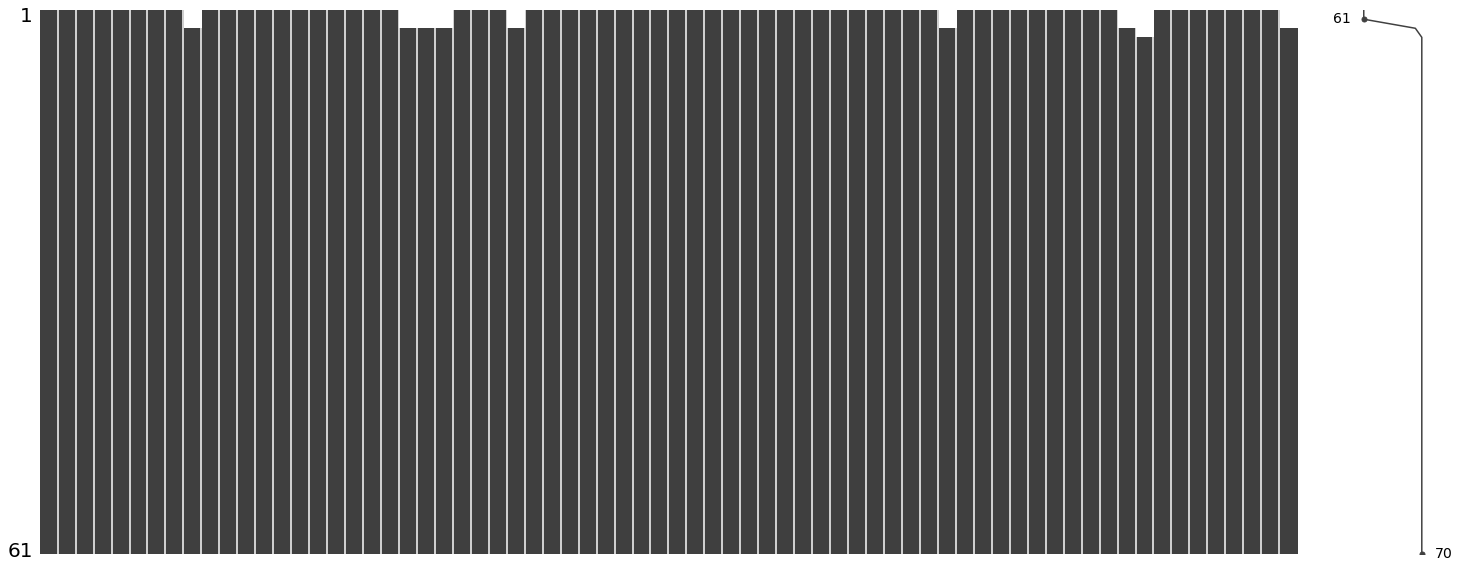

In [100]:
import missingno as msno

# Visualize -1 values for each column
msno.matrix(survey_cat.replace(-1, np.nan))

# Find column with most missing data
column_with_most_missing_data = survey.isnull().sum().idxmax()
column_with_most_missing_data



# Finally K-Mean Clustering!

In [101]:
survey_cat.columns

Index(['QID5', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q1_1', 'Q1_2', 'Q1_3', 'Q1_4', 'Q1_5', 'Q1_6', 'Q1_7', 'Q2.1', 'Q3.1',
       'Q4.1', 'Q5.1', 'Q7.1', 'Q1.1', 'Q2_1', 'Q2_2', 'Q3.2',
       'Q4.2 MC:Customizable',
       'Q5.2 MC:Air barrier/Thermal properties that benefit envelope performance',
       'Q5.2 MC:Fire resistant',
       'Q5.2 MC:Flexural strength (more flexible than wood alone)',
       'Q3.3 MC:A.  Quality and durability', 'Q3.3 MC:B. Resale value',
       'Q3.3 MC:C. Financing options',
       'Q3.3 MC:D. Design and customization limitations',
       'Q3.3 MC:E. Stigma or perception', 'Q3.3 MC:F. Other (Please Specify)',
       'Q5.2 MC:I wasn’t familiar with any of the benefits of metal as a building material',
       'Q5.2 MC:Minimal UV damage', 'Q5.2 MC:Pest resistant', 'Q5.2 MC:nan',
       'Q4.2 MC:Durable (structural integrity lends to longevity of the home)',
       'Q4.2 MC:Energy efficient', 'Q4.2 MC:Low cost', 'Q4.2 MC:No mo

In [102]:
# Demographics of the survey clustering analysis
survey_clustering = survey_df.loc[:, ['Q1.1', 'Q2_1', 'Q2_2', 'Q1_1.1', 'Q2.2', 'Q6.3', 'Q2_1.1', 'Q3_1', 'Q4_1', 'Q5_1.1', 'Q7_1', 'Q8_1', 'Q9_1', 'Q10_1', 'Q11_1']]
survey_clustering

,Q1.1,Q2_1,Q2_2,Q1_1.1,Q2.2,Q6.3,Q2_1.1,Q3_1,Q4_1,Q5_1.1,Q7_1,Q8_1,Q9_1,Q10_1,Q11_1
1,2,0,2,0,-1,1,-1,-1,1,0,0,0,1,0,-1
2,3,2,0,5,-1,0,-1,-1,2,0,0,5,5,0,-1
3,2,2,0,2,3,0,2,-1,0,4,0,2,2,2,2
4,0,4,0,2,3,0,0,2,2,0,0,1,1,4,1
5,0,3,0,4,0,3,4,1,0,2,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2,2,4,2,0,3,4,2,0,0,4,0,0,2,0
82,0,4,0,2,3,3,2,1,2,0,2,2,0,1,0
84,2,0,4,0,1,0,2,2,2,1,2,1,2,0,2
86,2,0,2,2,2,0,2,0,2,0,4,2,0,4,1


In [103]:
# K-Means Clustering!!!
# 1. Instantiate kMeans model
kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter = 300, n_init = "auto", random_state = 42)

# 2. Fit kMeans model with survey data
kmeans = kmeans.fit(survey_clustering)

# 3. Use fitted kMeans model to predict cluster memberships (labels)
labels = kmeans.predict(survey_clustering)

# 4. Attach labels to the original survey data
survey_clustering["Cluster"] = labels + 1
print(labels)


[1 2 1 1 1 1 2 2 1 2 1 2 0 0 1 2 2 0 1 2 0 2 1 0 1 0 1 1 0 0 1 1 1 2 2 2 1
 0 1 2 2 1 1 1 0 1 2 2 2 2 1 2 0 2 0 1 2 1 2 2 0]


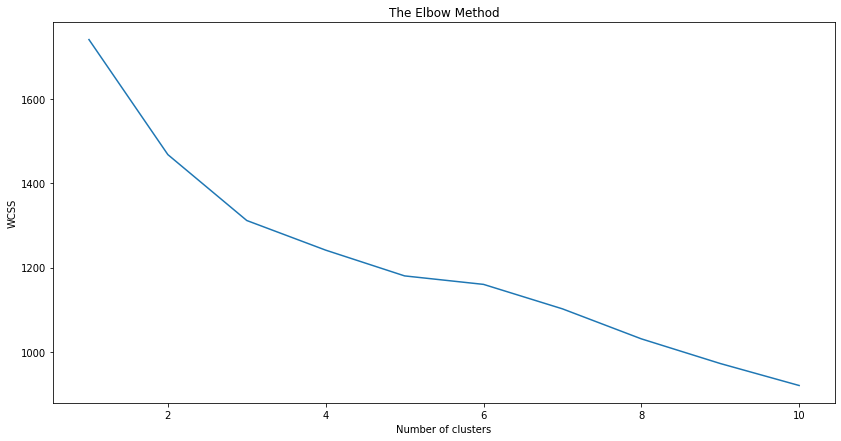

In [104]:
# 1. Create an empty list to hold Within Cluster Sum of Squares (WCSS)
wcss = []

# 2. Run k-means multiple times (here 11) with k = 1 to 11 and record WCSS (using .inertia_)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, n_init = "auto", random_state = 42)
    kmeans.fit(survey_clustering)
    wcss.append(kmeans.inertia_)

# 3. Plot WCSS against k in a line graph and look for 'The Elbow'
plt.rcParams['figure.figsize'] = (14, 7)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

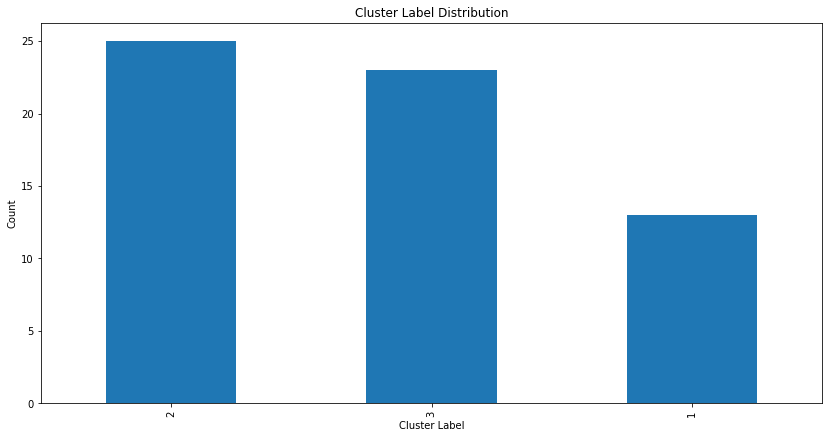

In [105]:
cluster_labels = survey_clustering['Cluster'].value_counts()
cluster_labels.plot(kind='bar')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.title('Cluster Label Distribution')
plt.show()

In [106]:
# Interpreting the clusters
survey_clustering[survey_clustering['Cluster'] == 1].value_counts()


Q1.1  Q2_1  Q2_2  Q1_1.1  Q2.2  Q6.3  Q2_1.1  Q3_1  Q4_1  Q5_1.1  Q7_1  Q8_1  Q9_1  Q10_1  Q11_1  Cluster
0     3     0     3       0     3     2       2     2     2       1     2     2     4      1      1          1
      4     0     4       1     3     4       5     0     0       2     0     0     5      0      1          1
      5     4     5       3     3     2       4     2     2       2     2     1     4      1      1          1
2     2     0     2       1     3     4       5     4     2       2     0     1     5      4      1          1
            3     2       0     3     1       2     2     0       2     2     2     4      2      1          1
      4     0     4       0     3     1       1     0     0       2     0     0     5      4      1          1
            2     2       1     3     0       5     0     4       1     4     4     5      4      1          1
                  3       2     3     4       5     0     0       0     0     0     1      0      1          1
      

In [107]:
# Preferences of the survey clustering analysis:
print(survey_clustering.describe())


            Q1.1       Q2_1       Q2_2     Q1_1.1       Q2.2       Q6.3  \
count  61.000000  61.000000  61.000000  61.000000  61.000000  61.000000   
mean    1.475410   2.131148   1.573770   2.016393   1.327869   2.049180   
std     1.042538   1.627630   1.442902   1.466195   1.513509   1.383549   
min     0.000000   0.000000   0.000000   0.000000  -1.000000   0.000000   
25%     0.000000   0.000000   0.000000   2.000000   0.000000   0.000000   
50%     2.000000   2.000000   2.000000   2.000000   1.000000   3.000000   
75%     2.000000   4.000000   2.000000   3.000000   2.000000   3.000000   
max     3.000000   5.000000   5.000000   5.000000   5.000000   3.000000   

          Q2_1.1       Q3_1       Q4_1     Q5_1.1       Q7_1       Q8_1  \
count  61.000000  61.000000  61.000000  61.000000  61.000000  61.000000   
mean    2.131148   1.754098   1.606557   1.196721   1.459016   1.262295   
std     1.359846   1.608889   1.068935   1.262533   1.177197   1.181830   
min    -1.000000  -1.000

## Demographics Cluster 1

In [127]:
cluster = 3

In [128]:
# Finding demographics of the survey clustering analysis:
survey_demographics_1 = survey_df.loc[(survey_df.index == survey_clustering.index) & (survey_clustering["Cluster"]== cluster), ['QID5', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']]
survey_demographics_1 = survey.loc[survey.index.isin(survey_demographics_1.index), ['QID5', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']]
survey_demographics_1

,QID5,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
2,I am not connected to Intrepid Build,Male,25-34 years old,White/Caucasian,Own,Living alone,Post-graduate,"$80,000 - $120,000",NaN,Other (Please Specify),28315
7,I am not connected to Intrepid Build,Male,25-34 years old,White/Caucasian,Own,Living with spouse/partner,Some graduate,"$120,000 - $150,000","$3,0001 - $4,000",Unemployed,27511
8,I am not connected to Intrepid Build,Male,25-34 years old,White/Caucasian,Own,Living with spouse/partner,Some graduate,"$80,000 - $120,000","$1,001 - $2,000",Other (Please Specify),27504
10,I am not connected to Intrepid Build,Female,25-34 years old,White/Caucasian,Own,Living with spouse/partner and children,Post-graduate,"$150,000 - $200,000","$3,0001 - $4,000",Employed full-time,27344
12,I am not connected to Intrepid Build,Male,25-34 years old,White/Caucasian,Rent,Living alone,Some graduate,"$120,000 - $150,000","$1,001 - $2,000",Other (Please Specify),27514
18,I am not connected to Intrepid Build,Male,35-44 years old,White/Caucasian,Rent,Living with roommates,Some graduate,"$25,000 - $50,000","$1,001 - $2,000",Other (Please Specify),27516
20,I am an Intrepid Build Community Partner/Corpo...,Female,35-44 years old,White/Caucasian,Own,Living alone,Post-graduate,Prefer not to say,$0 - $499,Employed part-time,27701
28,I am an Intrepid Build Employee,Male,25-34 years old,White/Caucasian,Own,Living with spouse/partner and children,College,"More than $200,000","$2,001 - $3,000",Employed full-time,27516
30,I am not connected to Intrepid Build,Male,25-34 years old,Latino or Hispanic,Rent,Living with spouse/partner,High School,Prefer not to say,"$2,001 - $3,000",Employed full-time,27703
42,I am not connected to Intrepid Build,Female,55-64 years old,White/Caucasian,Own,Living with spouse/partner and children,Post-graduate,"$150,000 - $200,000","$1,001 - $2,000",Employed full-time,27712


In [129]:
# survey_demographics_1.value_counts()

for column in survey_demographics_1.columns:
    print(survey_demographics_1[column].value_counts())
    print("\n")

QID5
I am not connected to Intrepid Build                                                           13
I am an Intrepid Build Community Partner/Corporate Partner                                      7
I am an Intrepid Build Manager                                                                  2
I am an Intrepid Build Employee                                                                 1
Which best describes your relationship with Intrepid Build? (Select from the dropdown menu)     0
Name: count, dtype: int64


Q1
Male                                                     15
Female                                                    6
Other                                                     1
Prefer not to say                                         1
Q1. What gender do you identify as? - Selected Choice     0
Name: count, dtype: int64


Q2
25-34 years old                9
35-44 years old                7
45-54 years old                5
55-64 years old                1
Prefer not 

## Preferences!!!


In [130]:
# Preferences of the survey clustering analysis:
survey_preferences_1 = survey_df.loc[(survey_df.index == survey_clustering.index) & (survey_clustering["Cluster"]== cluster), ['Q1.1', 'Q2_1', 'Q2_2', 'Q1_1.1', 'Q2.2', 'Q6.3', 'Q2_1.1', 'Q3_1', 'Q4_1', 'Q5_1.1', 'Q7_1', 'Q8_1', 'Q9_1', 'Q10_1', 'Q11_1']]
survey_preferences_1 = survey.loc[survey.index.isin(survey_demographics_1.index), ['Q1.1', 'Q2_1', 'Q2_2', 'Q1_1.1', 'Q2.2', 'Q6.3', 'Q2_1.1', 'Q3_1', 'Q4_1', 'Q5_1.1', 'Q7_1', 'Q8_1', 'Q9_1', 'Q10_1', 'Q11_1']]
survey_preferences_1

,Q1.1,Q2_1,Q2_2,Q1_1.1,Q2.2,Q6.3,Q2_1.1,Q3_1,Q4_1,Q5_1.1,Q7_1,Q8_1,Q9_1,Q10_1,Q11_1
2,Very familiar,Somewhat Favorable,Neutral,Very Unlikely,NaN,Maybe,NaN,NaN,Neutral agree nor disagree,Agree,Agree,Strongly disagree,Strongly disagree,Agree,NaN
7,Somewhat familiar,Neutral,Somewhat Favorable,Somewhat Likely,"$2,000 - $2,500",Yes,Disagree,Disagree,Neutral agree nor disagree,Neutral agree nor disagree,Disagree,Agree,Neutral agree nor disagree,Disagree,Agree
8,Somewhat familiar,Very Favorable,Neutral,Somewhat Likely,"$1,500 - $2,000",Maybe,Agree,Disagree,Neutral agree nor disagree,Agree,Strongly agree,Neutral agree nor disagree,Strongly disagree,Disagree,Disagree
10,Somewhat familiar,Somewhat Unfavorable,Somewhat Favorable,Somewhat Likely,"$1,500 - $2,000",Yes,Neutral agree nor disagree,Disagree,Strongly agree,Neutral agree nor disagree,Strongly agree,Neutral agree nor disagree,Neutral agree nor disagree,Agree,Agree
12,Not familiar at all,Neutral,Somewhat Unfavorable,Somewhat Unlikely,"$1,000 - $1,500",Yes,Disagree,Agree,Neutral agree nor disagree,Neutral agree nor disagree,Neutral agree nor disagree,Neutral agree nor disagree,Agree,Agree,Strongly disagree
18,Not familiar at all,Neutral,Somewhat Favorable,Neutral,"$500 - $1,000",Yes,Neutral agree nor disagree,Neutral agree nor disagree,Neutral agree nor disagree,Neutral agree nor disagree,Neutral agree nor disagree,Neutral agree nor disagree,Neutral agree nor disagree,Agree,Disagree
20,Somewhat familiar,Neutral,Somewhat Favorable,Somewhat Likely,"$1,000 - $1,500",Yes,Neutral agree nor disagree,Disagree,Neutral agree nor disagree,Agree,Neutral agree nor disagree,Neutral agree nor disagree,Neutral agree nor disagree,Agree,Neutral agree nor disagree
28,Somewhat familiar,Neutral,Somewhat Favorable,Very Unlikely,Less than $500,Maybe,Strongly disagree,Neutral agree nor disagree,Neutral agree nor disagree,Neutral agree nor disagree,Agree,Neutral agree nor disagree,Neutral agree nor disagree,Agree,Agree
30,Somewhat familiar,Neutral,Very Unfavorable,Somewhat Unlikely,Less than $500,Maybe,Neutral agree nor disagree,Neutral agree nor disagree,Neutral agree nor disagree,Agree,Neutral agree nor disagree,Neutral agree nor disagree,Strongly disagree,Disagree,Disagree
42,Not familiar at all,Neutral,Somewhat Unfavorable,Very Likely,"$1,500 - $2,000",Yes,Neutral agree nor disagree,Neutral agree nor disagree,Neutral agree nor disagree,Agree,Neutral agree nor disagree,Neutral agree nor disagree,Neutral agree nor disagree,Neutral agree nor disagree,Neutral agree nor disagree


In [131]:
for column in survey_preferences_1.columns:
    print(survey_preferences_1[column].value_counts())
    print("\n") 

Q1.1
Somewhat familiar                                    13
Not familiar at all                                   6
Very familiar                                         4
Q1. How familiar are you with steel-framed homes?     0
Name: count, dtype: int64


Q2_1
Neutral                                                                                                              15
Somewhat Favorable                                                                                                    6
Somewhat Unfavorable                                                                                                  1
Very Favorable                                                                                                        1
Q2. What is your perception of steel-framed homes compared to traditional stick-built homes? - Steel-Framed Homes     0
Very Unfavorable                                                                                                      0
Name: count, dtype